Your Name: Kieran Fitzmaurice

# Plotting Experimental Data

(Adapted from textbook exercise 3.1)

Posted on CourseWeb, you will find a file called `sunspots.txt`, which contains the observed number of sunspots on the sun for each month since January 1749. The file contains two columns of numbers, the first being the month and the second being the sunspot number.

Write a program that reads in the data and makes a graph of sunspots as a function of time. Label the $x$ and $y$-axes.

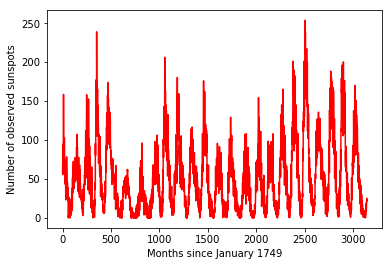

In [1]:
import numpy as np
import matplotlib.pyplot as plt

data = np.genfromtxt("/Users/kieranfitzmaurice/Documents/University of Pittsburgh/Academics/Sophomore Year/PHYS 1321/sunspots.txt")
x = data[0:,0]
y = data[0:,1]

plt.plot(x,y,'r-')
plt.xlabel("Months since January 1749")
plt.ylabel("Number of observed sunspots")
plt.show()
              

Modify (rewrite) your program to display only the first 1000 data points on the graph.

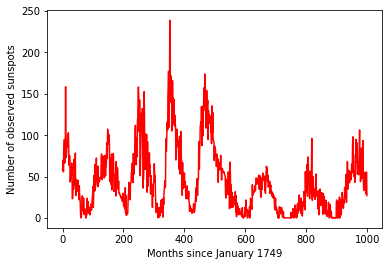

In [2]:
import numpy as np
import matplotlib.pyplot as plt

data = np.genfromtxt("/Users/kieranfitzmaurice/Documents/University of Pittsburgh/Academics/Sophomore Year/PHYS 1321/sunspots.txt")
x = data[0:1000,0]
y = data[0:1000,1]

plt.plot(x,y,'r-')
plt.xlabel("Months since January 1749")
plt.ylabel("Number of observed sunspots")
plt.show()

Modify your program further to calculate and plot the running average of the data, defined by
$$Y_k = {1\over2r} \sum_{m=-r}^r y_{k+m}\,,$$
where $r=5$ in this case (and the $y_k$ are the sunspot numbers). Have the program plot both the original data and the running average on the same graph, again over the range covered by the first 1000 data points. Include a legend with your plot.

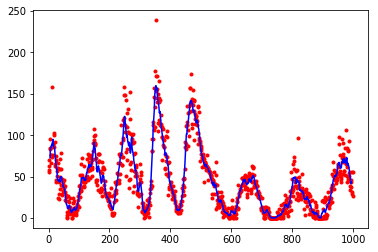

In [3]:

Yk = np.empty(len(y)-10)
n = 0

for i,val in enumerate(y):
    if 4 < i < len(y)-5:
        temp_Yk = 0
        for m in range(i-5,i+5):
            temp_Yk = temp_Yk + y[m]
        temp_Yk = temp_Yk / (2*5)
        Yk[n] = temp_Yk
        n = n + 1
        
plt.plot(x,y,'r.')
plt.plot(x[5:995],Yk,'b-')
plt.show()



# Curve Plotting

(Adapted from textbook exercise 3.2)

Although the `plot` function is designed primarily for plotting standard $xy$ graphs, it can be adapted for other kinds of plotting as well.

Make a plot of the so-called *deltoid* curve, which is defined parametrically by the equations
$$x = 2 \cos \theta + \cos 2\theta\,, \qquad y = 2 \sin \theta - \sin 2\theta\,,$$
where $0\le\theta<2\pi$. Take a set of 100 values of $\theta$ between zero and $2\pi$ and calculate $x$ and $y$ for each from the equations above, then plot $y$ as a function of $x$.

In [4]:
%reset -f

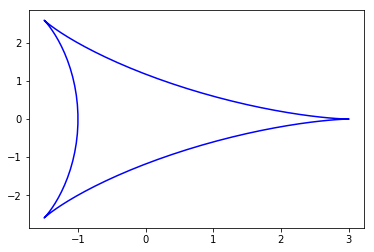

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

theta = np.linspace(0,2*pi,100)
x = 2*np.cos(theta) + np.cos(2*theta)
y = 2*np.sin(theta) - np.sin(2*theta)
plt.plot(x,y,'b-')
plt.show()

Taking this approach a step further, one can make a polar plot $r=f(\theta)$ for some function $f$ by calculating $r$ for a range of values of $\theta$ and then converting $r$ and $\theta$ to Cartesian coordinates using the standard equations $x = r\cos\theta$, $y = r\sin\theta$. Use this method to make a plot of the Galilean spiral $r = \theta^2$ for $0\le\theta\le10\pi$.

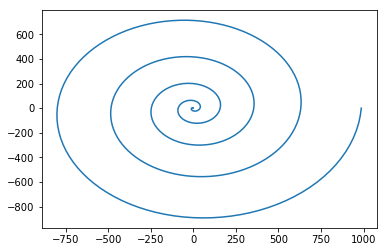

In [6]:
theta = np.linspace(0,10*pi,500)
r = np.power(theta,2)
x = r*np.cos(theta)
y = r*np.sin(theta)
""
plt.plot(x,y)
plt.show()



# Atomic Imaging

(Adapted from textbook exercise 3.3)

Posted on CourseWeb, you will find a file called *stm.txt*, which contains a grid of values from scanning tunneling microscope measurements of the (111) surface of silicon.  A scanning tunneling microscope (STM) is a device that measures the shape of a surface at the atomic level by tracking a sharp tip over the surface and measuring quantum
tunneling current as a function of position.  The end result is a grid of values that represent the height of the surface and the file *stm.txt* contains just such a grid of values.

Write a program that reads the data contained in the file and makes a density plot of the values using `imshow`.  Experiment with the various options that you can pass to `imshow` until you can show the structure of the silicon surface clearly.

In [7]:
%reset -f

In [8]:
#your code here


# The Mandelbrot Set

(Adapted from exercise 3.7)

The Mandelbrot set, named after its discoverer, the French mathematician Benoit Mandelbrot, is a *fractal*, an infinitely ramified mathematical object that contains structure within structure within structure, as deep as we care to look. The definition of the Mandelbrot set is in terms of complex numbers as follows.

Consider the equation
$$z' = z^2 + c\,,$$
where $z$ is a complex number and $c$ is a complex constant. For any given value of $c$ this equation turns an input number $z$ into an output number $z'$. The definition of the Mandelbrot set involves the repeated
iteration of this equation: we take an initial starting value of $z$ and feed it into the equation to get a new value $z'$. Then we take that value and feed it in again to get another value, and so forth.  The Mandelbrot set is the set of points in the complex plane that satisfies the following definition:

> For a given complex value of $c$, start with $z=0$ and iterate repeatedly. If the magnitude $|z|$ of the resulting value is ever greater than 2, then the point in the complex plane at position $c$ is *not* in the Mandelbrot set, otherwise it is in the set.

In order to use this definition one would, in principle, have to iterate infinitely many times to prove that a point is in the Mandelbrot set, since a point is in the set only if the iteration never passes $|z|=2$ ever. In
practice, however, one usually just performs some large number of iterations, say 100, and if $|z|$ hasn't exceeded 2 by that point then we call that good enough.

Write a program to make an image of the Mandelbrot set by performing the iteration for all values of $c=x+iy$ on an $N\times N$ grid spanning the region where $-2\le x\le 2$ and $-2\le y\le 2$. Make a density plot in which grid points inside the Mandelbrot set are colored black and those outside are colored white. The Mandelbrot set has a very distinctive shape that looks something like a beetle with a long snout - you'll know it when you see it.

Hint: You will probably find it useful to start off with quite a coarse grid, i.e., with a small value of $N$ - perhaps $N=100$ - so that your program runs quickly while you are testing it. Once you are sure it is working correctly, increase the value of $N$ to produce a final high-quality image of the shape of the set.

In [5]:
%reset -f

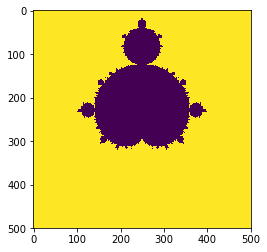

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

def Mand(c):
    q = 'n'
    z = 0
    for n in range(0,100):
        z = z**2 + c
        if abs(z) > 2:
            q = 'y'
            break
    if q == 'y':
        return(1)
    else:
        return(0)

N = 500

x = np.linspace(-1.5,1.5,N)
y = np.linspace(-1.5,1.5,N)
grid = np.zeros((N,N))

for xi,xval in enumerate(x):
    for yj,yval in enumerate(y):
        c = xval + 1j*yval
        grid[xi,yj] = Mand(c)
        
plt.imshow(grid) 
plt.show() 
#Wanted to do plt.imshow(grid) to display mandelbrot set, but kept getting errors. 
#Will come to office hours to figure it out.

Modify your code so that instead of coloring points just black or white, you color points according to the number of iterations of the equation before $|z|$ becomes greater than 2 (or the maximum number of iterations if $|z|$ never becomes greater than 2).  If you use one of the more colorful color schemes `matplotlib` provides for density plots, such as the `hot` or `jet` schemes, you can make some spectacular images this way.

In [11]:
#your code here

Another interesting variant is to color according to the logarithm of the number of iterations, which helps reveal some of the finer structure outside the set. Modify your code to create this plot.

In [12]:
#your code here
